<a href="https://colab.research.google.com/github/VimalMollyn/ED6001-Term-Project/blob/colab/3.%20Save%20patches%20of%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/VimalMollyn/ED6001-Term-Project.git

Cloning into 'ED6001-Term-Project'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 66 (delta 22), reused 40 (delta 11), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [ ]:
import numpy as np
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook

import sys
sys.path.insert(1, '/content/ED6001-Term-Project/Preprocessing/')
from utils import *

In [ ]:
path_to_data = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/data/IXI-T1")

In [ ]:
## generate patch
sample_file = next(path_to_data.iterdir())
sample_nii_img = nib.load(sample_file)
sample_img = sample_nii_img.get_fdata()
print(sample_img.shape)

(256, 256, 130)


In [ ]:
size = 32
depth = 6
stride = 8

middle = sample_img.shape[-1]//2

patch = sample_img[:size, :size, middle-depth//2:middle+depth//2].copy().transpose(2, 0, 1)
print(patch.shape)
patch = np.reshape(patch, (1, 1, depth, size, size))
print(patch.shape)

def generate_patch(params):
    stride = 8
    size = 32
    depth = 6
    num = 0
    files = os.listdir("../data/dataset/Free/")

    for file in files:
        free_img = nib.load("../data//dataset/Free/" + file).get_data()
        noised_img = nib.load("../data/dataset/noise_%d/%s" % (level, file)).get_data()
        free_img_set = None
        noised_img_set = None
        height, width, _ = free_img.shape
        for y in range(0, height - size, stride):
            for x in range(0, width - size, stride):
                free_img_temp = free_img[y : y + size, x : x + size].copy().transpose(2, 0, 1)
                noised_img_temp = noised_img[y : y + size, x : x + size].copy().transpose(2, 0, 1)
                free_img_temp = np.reshape(free_img_temp, (1, 1, depth, size, size))
                noised_img_temp = np.reshape(noised_img_temp, (1, 1, depth, size, size))

                if free_img_set is None:
                    free_img_set = free_img_temp
                    noised_img_set = noised_img_temp
                else:
                    free_img_set = np.append(free_img_set, free_img_temp, axis=0)
                    noised_img_set = np.append(noised_img_set, noised_img_temp, axis=0)
        num += 1
        print("-------" + str(num) + "-----------")
        print(noised_img_set.shape)
        print(free_img_set.shape)
        if not os.path.exists("../data/patchs32_32_%d/free/" % level):
            os.makedirs("../data/patchs32_32_%d/free/" % level)
            os.makedirs("../data/patchs32_32_%d/noised/" % level)
        np.save("../data/patchs32_32_%d/free/%d.npy" % (level, num), free_img_set)
        np.save("../data/patchs32_32_%d/noised/%d.npy" % (level, num), noised_img_set)

(6, 32, 32)
(1, 1, 6, 32, 32)


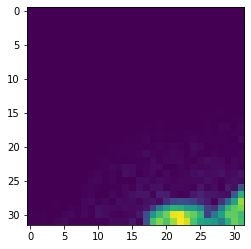

In [ ]:
plt.imshow(patch[0, 0, 1])